In [1]:
from os import sys
sys.path.append("/meshAfterParty/")

import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path
import neuron_visualizations as nviz


import datajoint_utils as du
from importlib import reload

INFO - 2020-11-30 19:20:18,409 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-11-30 19:20:18,411 - settings - Setting database.user to celiib
INFO - 2020-11-30 19:20:18,412 - settings - Setting database.password to newceliipass
INFO - 2020-11-30 19:20:18,416 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2020-11-30 19:20:18,417 - settings - Setting enable_python_native_blobs to True
INFO - 2020-11-30 19:20:18,430 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2020-11-30 19:20:18,632 - settings - Setting enable_python_native_blobs to True


In [2]:
import time
import datajoint_utils as du
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

from datajoint_utils import *

import error_detection as ed

minnie,schema = du.configure_minnie_vm()

INFO - 2020-11-30 19:20:21,620 - settings - Setting enable_python_native_blobs to True
INFO - 2020-11-30 19:20:21,843 - settings - Setting enable_python_native_blobs to True


# Histogram of Per Neuron what we are removing

In [3]:
n_errored_synapses = (minnie.AutoProofreadLabels & "n_synapses>0").fetch("n_errored_synapses")

In [8]:
n_errored_synapses_filt = n_errored_synapses[n_errored_synapses<np.percentile(n_errored_synapses,90)]

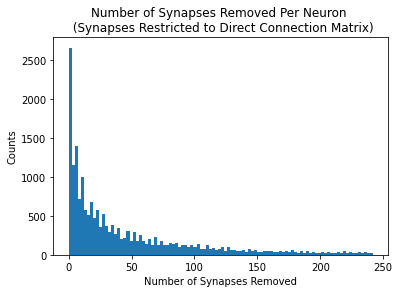

In [9]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.hist(n_errored_synapses_filt,bins=100,density=False)
ax.set_title("Number of Synapses Removed Per Neuron \n (Synapses Restricted to Direct Connection Matrix)")
ax.set_xlabel("Number of Synapses Removed")
ax.set_ylabel("Counts")

# ax.set_yscale("log")
#ax.set_xscale("log")
plt.show()